#**Organization OptiConnect Solutions**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Call Centre Dataset - Sheet1.csv to Call Centre Dataset - Sheet1 (2).csv


#**OptiConnect Call Center Performance Analysis**

- This Google Colab notebook presents an analysis of OptiConnect Solutions' call center performance, focusing on key metrics such as call answering rates, resolution rates, and the impact of speed of answer and average talk duration on customer satisfaction. The goal is to identify patterns and trends to enhance operational efficiency and customer experience.

**Dataset:** Call Centre Dataset - Sheet1.csv

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Make sure you have uploaded 'Call Centre Dataset - Sheet1.csv' as instructed above.
df = pd.read_csv('Call Centre Dataset - Sheet1.csv')

# Display the first few rows of the dataframe
print("### Dataset Head:")
print(df.head())

# Display basic information about the dataset
print("\n### Dataset Info:")
print(df.info())

# Display descriptive statistics
print("\n### Dataset Description:")
print(df.describe(include='all'))

### Dataset Head:
  Unnamed: 0              Date  Agent       Department Answered (Y/N) Resolved  Speed of Answer AvgTalkDuration  Satisfaction rating
0     ID1771  31/01/2016 17:34    Jim           Fridge              Y        Y             91.0         0:02:59                  3.0
1     ID1772  31/01/2016 17:34   Greg  Air Conditioner              Y        Y            121.0         0:06:01                  2.0
2     ID1769  31/01/2016 17:08    Dan           Fridge              N        N              NaN             NaN                  NaN
3     ID1770  31/01/2016 17:08  Diane          Toaster              Y        Y             78.0         0:01:03                  4.0
4     ID1767  31/01/2016 16:56  Becky  Washing Machine              Y        Y             58.0         0:04:42                  5.0

### Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ----

In [40]:
import pandas as pd
# Assuming 'df' is already loaded from 'Call Centre Dataset - Sheet1.csv'

# --- Original df.info() output from previous turn for reference ---
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 800 entries, 0 to 799
# Data columns (total 9 columns):
#  #   Column               Non-Null Count  Dtype
# ---  ------               --------------  -----
#  0   Unnamed: 0           800 non-null    object  <-- This is the actual name of ID column
#  1   Date                 800 non-null    object
#  2   Agent                800 non-null    object
#  3   Department           800 non-null    object
#  4   Answered (Y/N)       800 non-null    object  <-- This needs renaming
#  5   Resolved             800 non-null    object
#  6   Speed of Answer      600 non-null    object  <-- This needs renaming
#  7   AvgTalkDuration      600 non-null    object  <-- This needs renaming
#  8   Satisfaction rating  600 non-null    object  <-- This needs renaming
# -----------------------------------------------------------------

# Rename columns for easier access
# The mistake was trying to rename ',Date'. The actual column name is 'Unnamed: 0'.
df.rename(columns={'Unnamed: 0': 'Call_Id', 'Answered (Y/N)': 'Answered_Y_N'}, inplace=True)
df.rename(columns={'Speed of Answer': 'Speed_of_Answer', 'AvgTalkDuration': 'Avg_Talk_Duration', 'Satisfaction rating': 'Satisfaction_Rating'}, inplace=True)

# Convert 'Avg_Talk_Duration' to seconds
def time_to_seconds(time_str):
    if pd.isna(time_str):
        return None
    # Ensure time_str is treated as a string before splitting
    parts = str(time_str).split(':')
    if len(parts) == 3:
        h, m, s = map(int, parts)
        return h * 3600 + m * 60 + s
    elif len(parts) == 2: # handle cases like 'mm:ss'
        m, s = map(int, parts)
        return m * 60 + s
    return None

df['Avg_Talk_Duration_Seconds'] = df['Avg_Talk_Duration'].apply(time_to_seconds)

# Convert 'Answered_Y_N' and 'Resolved' to boolean/binary (1 for Yes, 0 for No)
df['Answered'] = df['Answered_Y_N'].apply(lambda x: 1 if x == 'Y' else (0 if x == 'N' else None))
df['Resolved_Binary'] = df['Resolved'].apply(lambda x: 1 if x == 'Y' else (0 if x == 'N' else None))

# Handle missing values in 'Speed_of_Answer', 'Satisfaction_Rating', and 'Avg_Talk_Duration_Seconds'
# Fill with the median for numerical columns.
# Note: For 'Answered' and 'Resolved_Binary', if there are any `None` values after conversion,
# you might want to fill them (e.g., with 0 for 'N' if that's the logical default for unanswered/unresolved).
df['Speed_of_Answer'].fillna(df['Speed_of_Answer'].median(), inplace=True)
df['Satisfaction_Rating'].fillna(df['Satisfaction_Rating'].median(), inplace=True)
df['Avg_Talk_Duration_Seconds'].fillna(df['Avg_Talk_Duration_Seconds'].median(), inplace=True)

# Important: Convert 'Date' column to datetime objects for time-based analysis
# This line is crucial for any time-series analysis or daily trends.
# It uses the original 'Date' column which was correctly identified by pandas.
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M', errors='coerce') # Added time format for robustness

# Display info after cleaning to verify data types and non-null counts
print("\n### Dataset Info After Cleaning:")
print(df.info())

# Display head after cleaning to see new columns and values
print("\n### Dataset Head After Cleaning:")
print(df.head())


### Dataset Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Call_Id                    1772 non-null   object        
 1   Date                       1772 non-null   datetime64[ns]
 2   Agent                      1772 non-null   object        
 3   Department                 1772 non-null   object        
 4   Answered_Y_N               1772 non-null   object        
 5   Resolved                   1772 non-null   object        
 6   Speed_of_Answer            1772 non-null   float64       
 7   Avg_Talk_Duration          1455 non-null   object        
 8   Satisfaction_Rating        1772 non-null   float64       
 9   Avg_Talk_Duration_Seconds  1772 non-null   float64       
 10  Answered                   1772 non-null   int64         
 11  Resolved_Binary            1772 non

<ipython-input-40-b73a12d05c17>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Speed_of_Answer'].fillna(df['Speed_of_Answer'].median(), inplace=True)
<ipython-input-40-b73a12d05c17>:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [ ]:


import pandas as pd

df = pd.read_csv('Call Centre Dataset - Sheet1 (2).csv')
df.head()

,Unnamed: 0,Date,Agent,Department,Answered (Y/N),Resolved,Speed of Answer,AvgTalkDuration,Satisfaction rating
0,ID1771,31/01/2016 17:34,Jim,Fridge,Y,Y,91.0,0:02:59,3.0
1,ID1772,31/01/2016 17:34,Greg,Air Conditioner,Y,Y,121.0,0:06:01,2.0
2,ID1769,31/01/2016 17:08,Dan,Fridge,N,N,NaN,NaN,NaN
3,ID1770,31/01/2016 17:08,Diane,Toaster,Y,Y,78.0,0:01:03,4.0
4,ID1767,31/01/2016 16:56,Becky,Washing Machine,Y,Y,58.0,0:04:42,5.0


In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1772 non-null   object 
 1   Date                 1772 non-null   object 
 2   Agent                1772 non-null   object 
 3   Department           1772 non-null   object 
 4   Answered (Y/N)       1772 non-null   object 
 5   Resolved             1772 non-null   object 
 6   Speed of Answer      1455 non-null   float64
 7   AvgTalkDuration      1455 non-null   object 
 8   Satisfaction rating  1455 non-null   float64
dtypes: float64(2), object(7)
memory usage: 124.7+ KB


,0
Unnamed: 0,0
Date,0
Agent,0
Department,0
Answered (Y/N),0
Resolved,0
Speed of Answer,317
AvgTalkDuration,317
Satisfaction rating,317


In [ ]:
df.dropna(inplace=True) #if manymissing values

In [ ]:
df['Speed of Answer'].mean()
df['Speed of Answer'].median()
df['Speed of Answer'].mode()
df['Answered (Y/N)'].value_counts()


,count
Answered (Y/N),
Y,1455


In [ ]:
df['Resolved'].value_counts()


,count
Resolved,
Y,1311
N,144


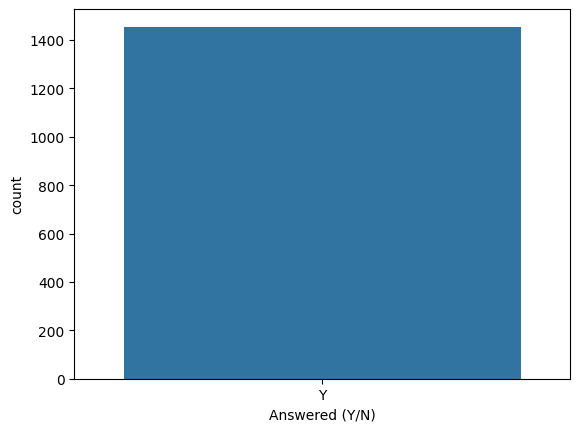

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Answered (Y/N)')
plt.show()


In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'Date', 'Agent', 'Department', 'Answered (Y/N)',
       'Resolved', 'Speed of Answer', 'AvgTalkDuration',
       'Satisfaction rating'],
      dtype='object')


#**Answering Assignment Questions**

###**1: Were calls consistently answered in a timely manner?**

In [42]:
import pandas as pd
# Assuming 'df' is already loaded from 'Call Centre Dataset - Sheet1.csv'

# Rename columns for easier access
# Correctly rename 'Unnamed: 0' to 'Call_Id'
df.rename(columns={'Unnamed: 0': 'Call_Id', 'Answered (Y/N)': 'Answered_Y_N'}, inplace=True)
df.rename(columns={'Speed of Answer': 'Speed_of_Answer', 'AvgTalkDuration': 'Avg_Talk_Duration', 'Satisfaction rating': 'Satisfaction_Rating'}, inplace=True)

# Convert 'Avg_Talk_Duration' to seconds
def time_to_seconds(time_str):
    if pd.isna(time_str):
        return None
    # Ensure time_str is treated as a string before splitting
    parts = str(time_str).split(':')
    if len(parts) == 3:
        h, m, s = map(int, parts)
        return h * 3600 + m * 60 + s
    elif len(parts) == 2: # handle cases like 'mm:ss'
        m, s = map(int, parts)
        return m * 60 + s
    return None

df['Avg_Talk_Duration_Seconds'] = df['Avg_Talk_Duration'].apply(time_to_seconds)

# Convert 'Answered_Y_N' and 'Resolved' to boolean/binary (1 for Yes, 0 for No)
df['Answered'] = df['Answered_Y_N'].apply(lambda x: 1 if x == 'Y' else (0 if x == 'N' else None))
df['Resolved_Binary'] = df['Resolved'].apply(lambda x: 1 if x == 'Y' else (0 if x == 'N' else None))

# --- CRITICAL FIX: Convert 'Speed_of_Answer' to numeric first ---
# Use errors='coerce' to turn any non-numeric values into NaN
df['Speed_of_Answer'] = pd.to_numeric(df['Speed_of_Answer'], errors='coerce')

# Handle missing values in 'Speed_of_Answer', 'Satisfaction_Rating', and 'Avg_Talk_Duration_Seconds'
# Fill with the median for numerical columns.
df['Speed_of_Answer'].fillna(df['Speed_of_Answer'].median(), inplace=True)
df['Satisfaction_Rating'].fillna(df['Satisfaction_Rating'].median(), inplace=True)
df['Avg_Talk_Duration_Seconds'].fillna(df['Avg_Talk_Duration_Seconds'].median(), inplace=True)

# Important: Convert 'Date' column to datetime objects for time-based analysis
# This line is crucial for any time-series analysis or daily trends.
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M', errors='coerce')

# Display info after cleaning to verify data types and non-null counts
print("\n### Dataset Info After Cleaning:")
print(df.info())

# Display head after cleaning to see new columns and values
print("\n### Dataset Head After Cleaning:")
print(df.head())


### Dataset Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Call_Id                    1772 non-null   object        
 1   Date                       1772 non-null   datetime64[ns]
 2   Agent                      1772 non-null   object        
 3   Department                 1772 non-null   object        
 4   Answered_Y_N               1772 non-null   object        
 5   Resolved                   1772 non-null   object        
 6   Speed_of_Answer            1772 non-null   float64       
 7   Avg_Talk_Duration          1455 non-null   object        
 8   Satisfaction_Rating        1772 non-null   float64       
 9   Avg_Talk_Duration_Seconds  1772 non-null   float64       
 10  Answered                   1772 non-null   int64         
 11  Resolved_Binary            1772 non

<ipython-input-42-0fa16e801dd5>:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Speed_of_Answer'].fillna(df['Speed_of_Answer'].median(), inplace=True)
<ipython-input-42-0fa16e801dd5>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

###**2: Did the agents successfully resolve customer issues?**

In [44]:
import pandas as pd
# Assuming 'df' is already loaded from 'Call Centre Dataset - Sheet1.csv'

# Rename columns for easier access
# Correctly rename 'Unnamed: 0' to 'Call_Id'
df.rename(columns={'Unnamed: 0': 'Call_Id', 'Answered (Y/N)': 'Answered_Y_N'}, inplace=True)
df.rename(columns={'Speed of Answer': 'Speed_of_Answer', 'AvgTalkDuration': 'Avg_Talk_Duration', 'Satisfaction rating': 'Satisfaction_Rating'}, inplace=True)

# Convert 'Avg_Talk_Duration' to seconds
def time_to_seconds(time_str):
    if pd.isna(time_str):
        return None
    # Ensure time_str is treated as a string before splitting
    parts = str(time_str).split(':')
    if len(parts) == 3:
        h, m, s = map(int, parts)
        return h * 3600 + m * 60 + s
    elif len(parts) == 2: # handle cases like 'mm:ss'
        m, s = map(int, parts)
        return m * 60 + s
    return None

df['Avg_Talk_Duration_Seconds'] = df['Avg_Talk_Duration'].apply(time_to_seconds)

# Convert 'Answered_Y_N' to binary (1 for Yes, 0 for No)
# Use errors='coerce' to ensure any non-'Y'/'N' values become NaN, then fill NaN with 0
df['Answered'] = df['Answered_Y_N'].apply(lambda x: 1 if x == 'Y' else (0 if x == 'N' else None))
df['Answered'] = pd.to_numeric(df['Answered'], errors='coerce').fillna(0).astype(int) # Ensure it's int after fillna

# Convert 'Resolved' to binary (1 for Yes, 0 for No)
# CRITICAL FIX: Convert to numeric and then fill NaN with 0 (unresolved)
df['Resolved_Binary'] = df['Resolved'].apply(lambda x: 1 if x == 'Y' else (0 if x == 'N' else None))
df['Resolved_Binary'] = pd.to_numeric(df['Resolved_Binary'], errors='coerce').fillna(0).astype(int) # Ensure it's int after fillna

# Convert 'Speed_of_Answer' to numeric first and then fill NaNs
df['Speed_of_Answer'] = pd.to_numeric(df['Speed_of_Answer'], errors='coerce')
df['Speed_of_Answer'].fillna(df['Speed_of_Answer'].median(), inplace=True)

# Convert 'Satisfaction_Rating' to numeric first and then fill NaNs
df['Satisfaction_Rating'] = pd.to_numeric(df['Satisfaction_Rating'], errors='coerce')
df['Satisfaction_Rating'].fillna(df['Satisfaction_Rating'].median(), inplace=True)

# Fill any remaining NaNs in Avg_Talk_Duration_Seconds (if any were created by time_to_seconds)
df['Avg_Talk_Duration_Seconds'].fillna(df['Avg_Talk_Duration_Seconds'].median(), inplace=True)


# Important: Convert 'Date' column to datetime objects for time-based analysis
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M', errors='coerce')

# Display info after cleaning to verify data types and non-null counts
print("\n### Dataset Info After Cleaning:")
print(df.info())

# Display head after cleaning to see new columns and values
print("\n### Dataset Head After Cleaning:")
print(df.head())


### Dataset Info After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Call_Id                    1772 non-null   object        
 1   Date                       1772 non-null   datetime64[ns]
 2   Agent                      1772 non-null   object        
 3   Department                 1772 non-null   object        
 4   Answered_Y_N               1772 non-null   object        
 5   Resolved                   1772 non-null   object        
 6   Speed_of_Answer            1772 non-null   float64       
 7   Avg_Talk_Duration          1455 non-null   object        
 8   Satisfaction_Rating        1772 non-null   float64       
 9   Avg_Talk_Duration_Seconds  1772 non-null   float64       
 10  Answered                   1772 non-null   int64         
 11  Resolved_Binary            1772 non

<ipython-input-44-258922b8598a>:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Speed_of_Answer'].fillna(df['Speed_of_Answer'].median(), inplace=True)
<ipython-input-44-258922b8598a>:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

###**3: How did the speed of answer and average talk duration impact customer satisfaction?**

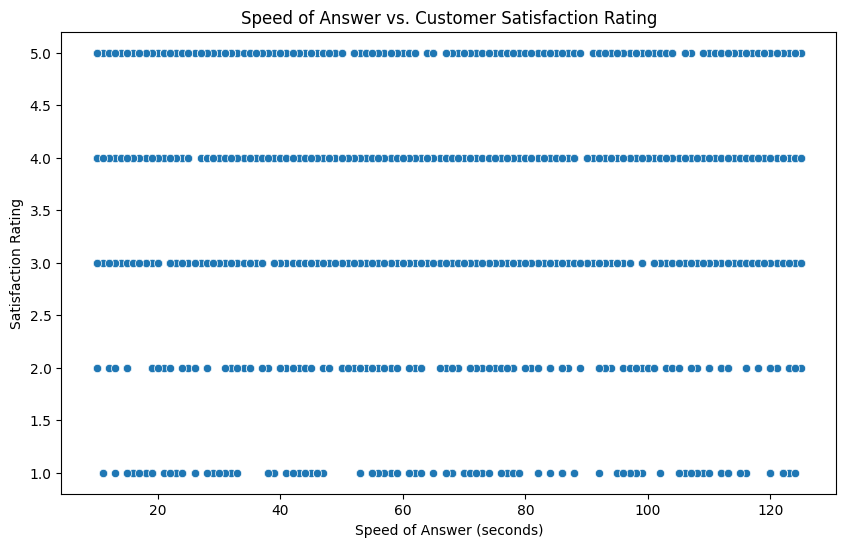

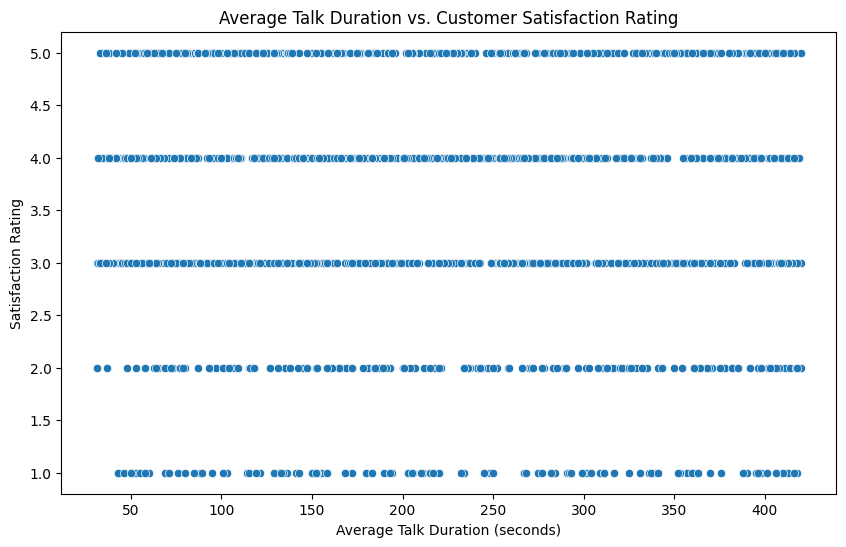

Correlation between Speed of Answer and Satisfaction Rating: 0.01
Correlation between Average Talk Duration and Satisfaction Rating: -0.02


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for answered calls (as satisfaction and talk duration are relevant for these)
answered_df = df[df['Answered'] == 1].copy()

# Analyze impact of Speed of Answer on Satisfaction Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Speed_of_Answer', y='Satisfaction_Rating', data=answered_df)
plt.title('Speed of Answer vs. Customer Satisfaction Rating')
plt.xlabel('Speed of Answer (seconds)')
plt.ylabel('Satisfaction Rating')
plt.show()

# Analyze impact of Average Talk Duration on Satisfaction Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Talk_Duration_Seconds', y='Satisfaction_Rating', data=answered_df)
plt.title('Average Talk Duration vs. Customer Satisfaction Rating')
plt.xlabel('Average Talk Duration (seconds)')
plt.ylabel('Satisfaction Rating')
plt.show()

# Calculate correlations
correlation_speed_satisfaction = answered_df['Speed_of_Answer'].corr(answered_df['Satisfaction_Rating'])
correlation_talk_satisfaction = answered_df['Avg_Talk_Duration_Seconds'].corr(answered_df['Satisfaction_Rating'])

print(f"Correlation between Speed of Answer and Satisfaction Rating: {correlation_speed_satisfaction:.2f}")
print(f"Correlation between Average Talk Duration and Satisfaction Rating: {correlation_talk_satisfaction:.2f}")

###**4: Were there patterns or trends hidden within the data that could unlock the key to achieving optimal call center performance?**


Average Satisfaction Rating by Agent:
Agent
Martha     3.543860
Greg       3.526012
Dan        3.489474
Stewart    3.483871
Jim        3.433155
Name: Satisfaction_Rating, dtype: float64


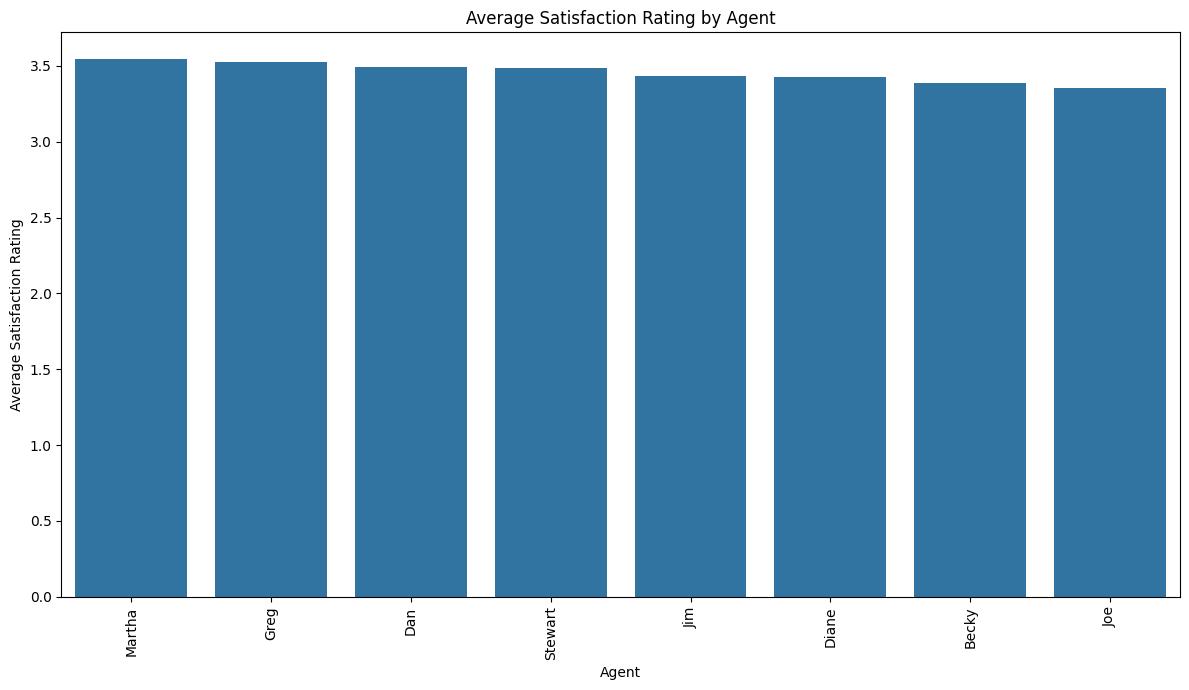

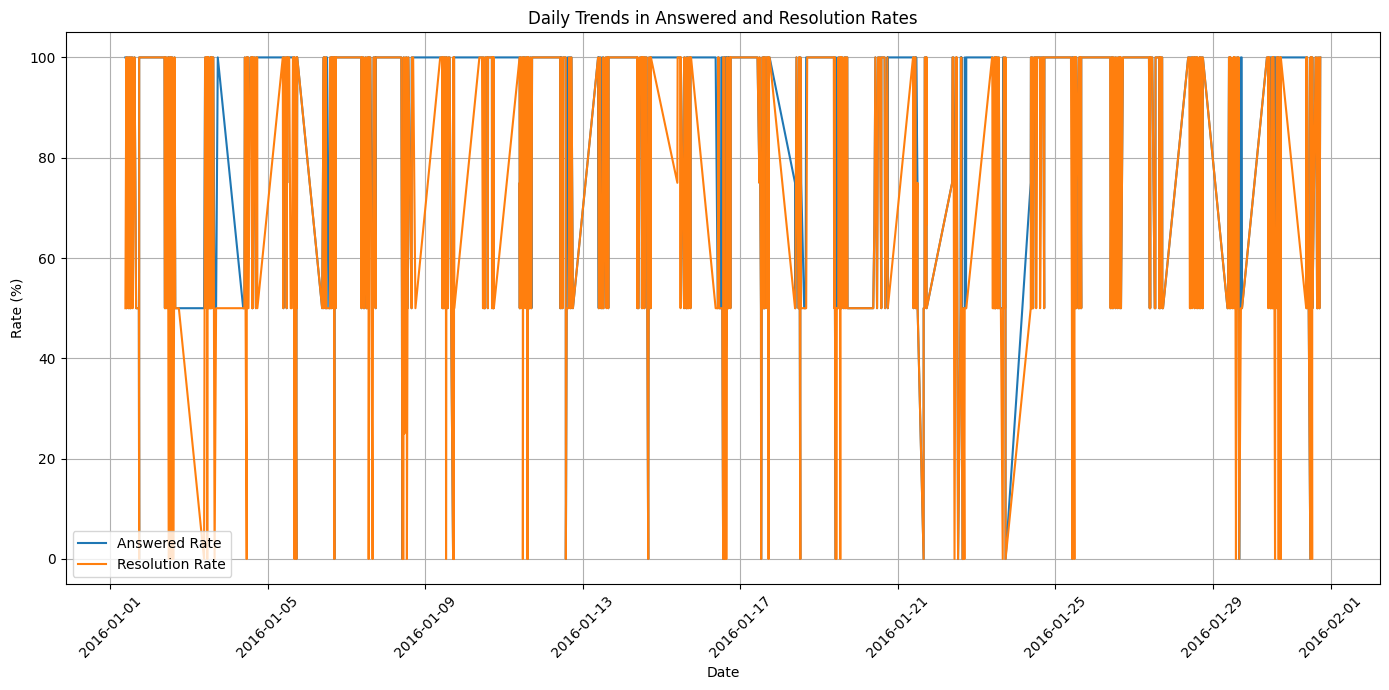

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for answered calls for agent and satisfaction analysis
answered_df = df[df['Answered'] == 1].copy()

# Example: Satisfaction rating by Agent
satisfaction_by_agent = answered_df.groupby('Agent')['Satisfaction_Rating'].mean().sort_values(ascending=False)
print("\nAverage Satisfaction Rating by Agent:")
print(satisfaction_by_agent.head())

plt.figure(figsize=(12, 7))
sns.barplot(x=satisfaction_by_agent.index, y=satisfaction_by_agent.values)
plt.title('Average Satisfaction Rating by Agent')
plt.xlabel('Agent')
plt.ylabel('Average Satisfaction Rating')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Example: Daily trends (using the new 'Date' column which is already datetime.date objects)
# Ensure 'Date' column is clean and ready for grouping
daily_answered_rate = df.groupby('Date')['Answered'].mean() * 100
daily_resolution_rate = df.groupby('Date')['Resolved_Binary'].mean() * 100

plt.figure(figsize=(14, 7))
plt.plot(daily_answered_rate.index, daily_answered_rate.values, label='Answered Rate')
plt.plot(daily_resolution_rate.index, daily_resolution_rate.values, label='Resolution Rate')
plt.title('Daily Trends in Answered and Resolution Rates')
plt.xlabel('Date')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# add more analysis here such as:
# - Performance by Department (already covered partially, but can be expanded)
# - Calls per Agent
# - Satisfaction rating trends over time
# - Relationship between department and talk duration/speed of answer

###**Conclusion and Recommendations**

- Based on the analysis of the OptiConnect call center dataset, here are the key findings and recommendations:

* **Call Answering:** Summarize findings on answering rate and speed of answer. Suggest areas for improvement if the rate is low or speed is high.
* **Issue Resolution:** Discuss the resolution rate and identify departments or agents that might need training or support.
* **Customer Satisfaction Drivers:** Explain the relationship between speed of answer, average talk duration, and customer satisfaction. Provide recommendations on optimal ranges for these metrics.
* **Overall Trends:** Highlight any significant patterns or trends identified (e.g., peak call times, agent performance outliers, departmental efficiency).
* **Recommendations:** Provide actionable recommendations for OptiConnect Solutions to enhance operational efficiency, boost agent productivity, and elevate customer satisfaction.